<a id='top'></a>
# План проекта:
### <a href='#Step_1'>Импорт файлов с данными и изучение общей информации</a>
#### <a href='#Step_1_conclusion'>Вывод</a>

### <a href='#Step_2'>Подготовка данных</a>
#### <a href='#Step_2_conclusion'>Вывод</a>

### <a href='#Step_3'>Метрики продукта</a>
#### <a href='#Step_3_1'>Количество уникальных пользователей в день (DAU)</a>
#### <a href='#Step_3_2'>Количество уникальных пользователей в неделю (WAU)</a>
#### <a href='#Step_3_3'>Количество уникальных пользователей в месяц (MAU)</a>
#### <a href='#Step_3_4'>Количество сессий в день</a>
#### <a href='#Step_3_5'>Средняя продолжительность сессии (ASL)</a>
#### <a href='#Step_3_6'>Retantion rate</a>
#### <a href='#Step_3_conclusion'>Вывод</a>

### <a href='#Step_4'>Метрики продаж</a>
#### <a href='#Step_4_1'>Когда люди начинают покупать?</a>
#### <a href='#Step_4_2'>Сколько раз покупают за период?</a>
#### <a href='#Step_4_3'>Какой средний чек?</a>
#### <a href='#Step_4_4'>Сколько денег приносят? (LTV)</a>
#### <a href='#Step_4_conclusion'>Вывод</a>

### <a href='#Step_5'>Метрики маркетинга</a>
#### <a href='#Step_5_1'>Сколько денег потратили? Всего / на каждый источник / по времени</a>
#### <a href='#Step_5_2'>Сколько стоило привлечение одного покупателя из каждого источника?</a>
#### <a href='#Step_5_3'>На сколько окупились расходы? (ROI)</a>
#### <a href='#Step_5_conclusion'>Вывод</a>

### <a href='#Step_6'>Общий вывод</a>

<a id='Step_1'></a>
## Импорт файлов с данными и изучение общей информации. 

In [130]:
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display
import seaborn as sns

In [131]:
#Импортируем датасет visits
visits = pd.read_csv('/datasets/visits_log.csv')

In [132]:
#Изучим датасет методом info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [133]:
#Выведем строки датасета методом sample()
visits.sample(5)

,Device,End Ts,Source Id,Start Ts,Uid
137148,desktop,2017-08-27 10:25:00,5,2017-08-27 10:13:00,4128550491241539303
336348,touch,2018-02-02 23:28:00,5,2018-02-02 23:28:00,14923888454099412609
36158,desktop,2017-12-17 14:45:00,2,2017-12-17 14:07:00,16988104868656799475
219395,desktop,2017-11-25 10:10:00,3,2017-11-25 10:07:00,4587951191838303602
63070,desktop,2018-01-09 14:27:00,2,2018-01-09 14:26:00,5349430607040830369


In [134]:
#Импортируем датасет orders
orders = pd.read_csv('/datasets/orders_log.csv')

In [135]:
#Изучим датасет методом info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [136]:
#Выведем строки датасета методом sample()
orders.sample(5)

,Buy Ts,Revenue,Uid
18700,2017-11-21 16:13:00,3.05,9682731568684025500
24038,2017-12-14 14:22:00,2.14,16597657553420420920
16996,2017-11-11 08:45:00,0.73,16333740229681425319
3444,2017-07-15 11:31:00,11.00,17582304514049506622
48486,2018-05-22 16:01:00,0.92,464645644851555406


In [137]:
#Импортируем датасет costs
costs = pd.read_csv('/datasets/costs.csv')

In [138]:
#Изучим датасет методом info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [139]:
#Выведем строки датасета методом sample()
costs.sample(5)

,source_id,dt,costs
657,2,2018-03-22,142.55
2171,9,2018-05-24,6.11
1131,4,2017-07-13,59.66
1000,3,2018-03-02,646.35
538,2,2017-11-23,161.19


<a id='Step_1_conclusion'></a>
### Вывод:
1. visits - необходимо избавиться от пробелов наименованиях столбцов, первести в нижний регистр,
2. orders - необходимо избавиться от пробелов наименованиях столбцов, первести в нижний регистр,
2. все таблицы - необходимо первести стобцы с датой и временем к типу данных datetime

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_2'></a>
## Подготовка данных 

In [140]:
#Переименуем названия столбцов в visits
visits = visits.rename(columns={
    'Device': 'device',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Start Ts': 'start_ts',
    'Uid': 'uid'})

In [141]:
#Переименуем названия столбцов в orders
orders = orders.rename(columns={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid'})

In [142]:
#Изменим тип данных в visits
visits.end_ts = pd.to_datetime(visits.end_ts)
visits.start_ts = pd.to_datetime(visits.start_ts)

In [143]:
#Изменим тип данных в orders
orders.buy_ts = pd.to_datetime(orders.buy_ts)

In [144]:
#Изменим тип данных в costs
costs.dt = pd.to_datetime(costs.dt)

In [145]:
#Проверим результат преобразования в visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [146]:
#Проверим результат преобразования в orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [147]:
#Проверим результат преобразования в costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<a id='Step_2_conclusion'></a>
### Вывод:
1. Преобразованы заголовки столбцов
2. Изменены типы данных
3. Пропуски отсутствуют

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_3'></a>
# Метрики продукта 


## Сколько людей пользуются в день, неделю, месяц? 

In [148]:
#Добавим столбец с годом в df visits
visits['year'] = visits['start_ts'].dt.year

In [149]:
#Добавим столбец с порядковым номером недели в df visits
visits['week'] = visits['start_ts'].dt.week

In [150]:
#Добавим столбец с порядковым номером месяца в df visits
visits['month'] = visits['start_ts'].dt.month

In [151]:
#Добавим столбец с датой в df visits
visits['day'] = visits['start_ts'].astype('datetime64[D]')

<a id='Step_3_1'></a>
### Количество уникальных пользователей в день (DAU)

Text(0, 0.5, 'Количество уникальных пользователей')

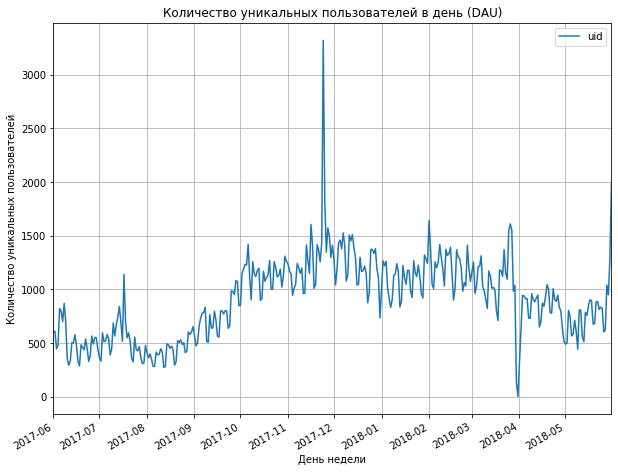

In [152]:
#Визуализируем динамику количества уникальных пользователей в день
visits.groupby('day').agg({'uid':'nunique'}).plot(figsize=(10,8), grid=True)
plt.title('Количество уникальных пользователей в день (DAU)')
plt.xlabel('День недели')
plt.ylabel('Количество уникальных пользователей')

In [153]:
print('Среднее кол-во пользователей в день (DAU):', visits.groupby('day').agg({'uid':'nunique'}).mean().round())

Среднее кол-во пользователей в день (DAU): uid    908.0
dtype: float64


<a id='Step_3_2'></a>
### Количество уникальных пользователей в неделю (WAU)

Text(0, 0.5, 'Количество уникальных пользователей')

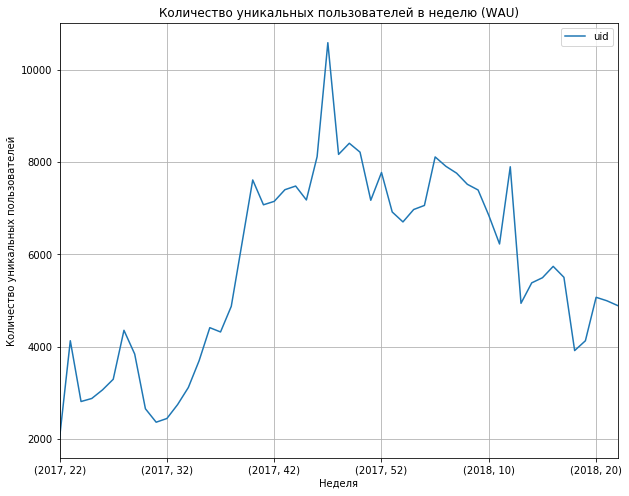

In [154]:
#Визуализируем динамику количества уникальных пользователей в неделю
visits.groupby(['year','week']).agg({'uid':'nunique'}).plot(figsize=(10,8), grid=True)
plt.title('Количество уникальных пользователей в неделю (WAU)')
plt.xlabel('Неделя')
plt.ylabel('Количество уникальных пользователей')

In [155]:
print('Среднее кол-во пользователей в неделю (WAU):', visits.groupby(['year','week']).agg({'uid':'nunique'}).mean().round())

Среднее кол-во пользователей в неделю (WAU): uid    5716.0
dtype: float64


<a id='Step_3_3'></a>
### Количество уникальных пользователей в месяц (MAU)

Text(0, 0.5, 'Количество уникальных пользователей')

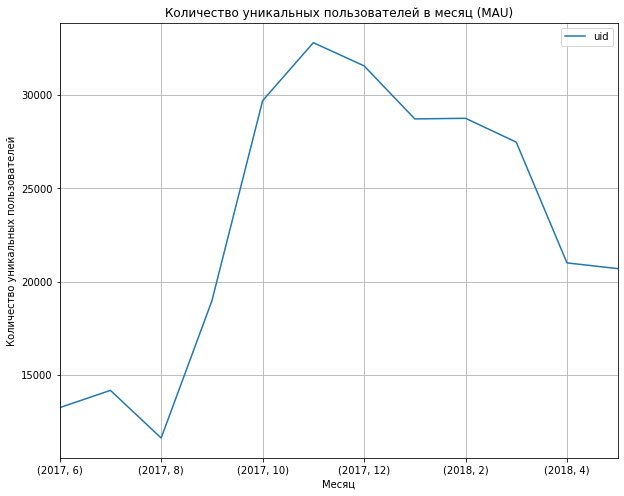

In [156]:
#Визуализируем динамику количества уникальных пользователей в месяц
visits.groupby(['year','month']).agg({'uid':'nunique'}).plot(figsize=(10,8), grid=True)
plt.title('Количество уникальных пользователей в месяц (MAU)')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных пользователей')

In [157]:
print('Среднее кол-во пользователей в месяц (MAU):', visits.groupby(['year','month']).agg({'uid':'nunique'}).mean().round())

Среднее кол-во пользователей в месяц (MAU): uid    23228.0
dtype: float64


<a id='Step_3_4'></a>
### Количество сессий в день 

Text(0, 0.5, 'Количество сессий')

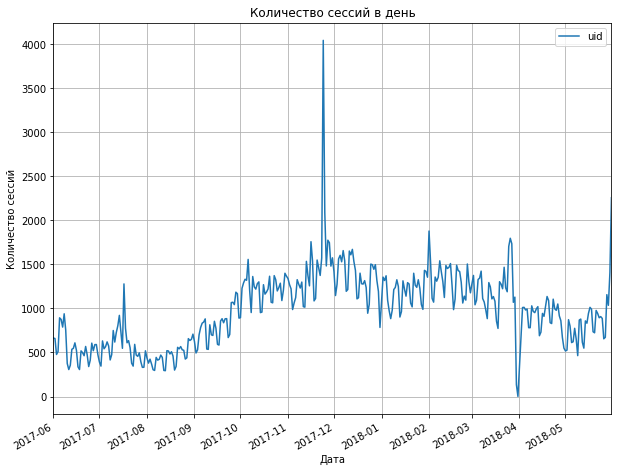

In [158]:
#Визуализируем динамику количества сессий в день
visits.groupby('day').agg({'uid':'count'}).plot(figsize=(10,8), grid=True)
plt.title('Количество сессий в день')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')

In [159]:
#Посчитаем количество сессий на одного пользователя в месяц
sessions_per_user = visits.groupby(['year', 'month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions']/sessions_per_user['n_users']
sessions_per_user

n_sessions  n_users  sessions_per_user
year month                                        
2017 6           16505    13259           1.244815
     7           17828    14183           1.256998
     8           14355    11631           1.234202
     9           23907    18975           1.259921
     10          37903    29692           1.276539
     11          43969    32797           1.340641
     12          41983    31557           1.330386
2018 1           36939    28716           1.286356
     2           37182    28749           1.293332
     3           35679    27473           1.298693
     4           26515    21008           1.262138
     5           26635    20701           1.286653

<a id='Step_3_5'></a>
### Средняя продолжительность сессии (ASL) 

In [160]:
#Для каждой сессии найдем продолжительность сессии
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Text(0.5, 0, 'Продолжительность сессии')

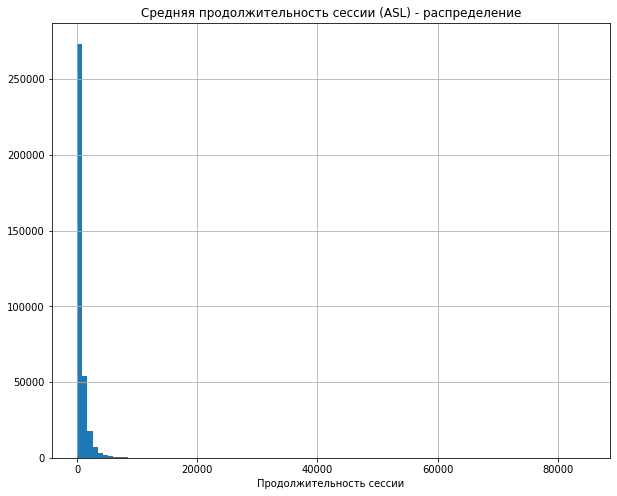

In [161]:
#Построим распределение продолжительности сессий
visits['session_duration'].hist(bins=100, figsize=(10,8))
plt.title('Средняя продолжительность сессии (ASL) - распределение')
plt.xlabel('Продолжительность сессии')

In [162]:
#Исследуем продолжительность сессий методом describe
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

In [163]:
#более 250 тыс. сессий имеют продолжительность 0 сек. 
#Это не позволяет корректно судить о средней продолжительности сессии по среднему и медиане. 
print('Средняя продолжительность сессии (секунд):', visits['session_duration'].mode())

Средняя продолжительность сессии (секунд): 0    60
dtype: int64


<a id='Step_3_6'></a>
### Retention Rate (по всем устройствам)

In [164]:
#Найдем дату первого заказа для каждого пользователя
first_activity_date = visits.groupby(['uid'])['start_ts'].min()

In [165]:
#Переименуем название столбца
first_activity_date.name = 'first_activity_date'

In [166]:
#Добавим столбец 'first_activity_date' в visits
visits = visits.join(first_activity_date, on='uid')

In [167]:
#Добавим столбец 'first_activity_month' в visits
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

In [168]:
#Добавим столбец 'activity_month' в visits
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')

In [169]:
#Добавим столбец 'cohort_lifetime' в visits
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [170]:
#Построим когорты
cohorts = (visits.groupby(['first_activity_month', 'cohort_lifetime'])
           .agg({'uid':'nunique'}).reset_index())

In [171]:
#Посчитаем количество пользователей в первый месяц существования когорты
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [172]:
#Перименуем название столбца с количеством первоначальных пользователей
initial_users_count.columns = ['first_activity_month', 'cohort_users']

In [173]:
#Добавим столбец с количесвом первоначальных пользователей
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

In [174]:
#Посчитаем ретеншен
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [175]:
#Исключим из сводной таблицы RR первого месяца
cohorts = cohorts[cohorts['cohort_lifetime'] > 0]

In [176]:
#Построим сводную таблицу
retention = cohorts.pivot_table(index='first_activity_month', 
                                columns='cohort_lifetime', 
                                values='retention', 
                                aggfunc='sum')

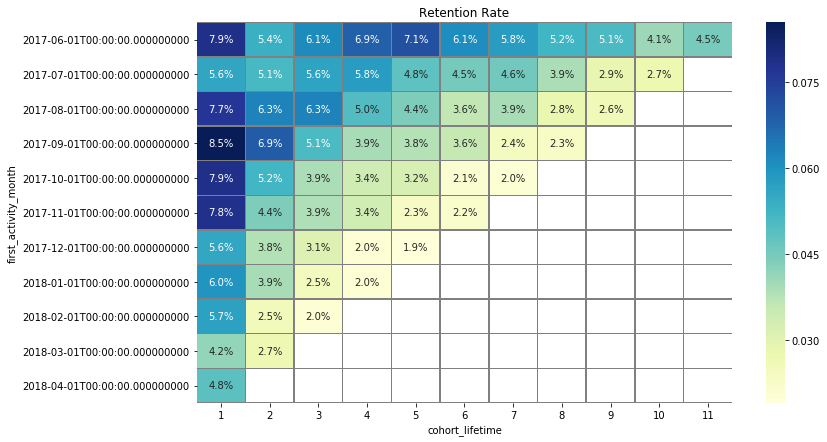

In [177]:
#Построим heatmap
plt.figure(figsize=(12, 7))
plt.title('Retention Rate')
sns.heatmap(retention, annot=True, linewidths=0.5, fmt='.1%', linecolor='gray', cmap='YlGnBu')

### Retention Rate (Desktop)

In [178]:
desktop_visits = visits.query('device == "desktop"')

In [179]:
#Построим когорты
desktop_cohorts = (desktop_visits.groupby(['first_activity_month', 'cohort_lifetime'])
           .agg({'uid':'nunique'}).reset_index())

In [180]:
#Посчитаем количество пользователей в первый месяц существования когорты
initial_users_count_desktop = desktop_cohorts[desktop_cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [181]:
#Перименуем название столбца с количеством первоначальных пользователей
initial_users_count_desktop.columns = ['first_activity_month', 'cohort_users']

In [182]:
#Добавим столбец с количесвом первоначальных пользователей
desktop_cohorts = desktop_cohorts.merge(initial_users_count_desktop, on='first_activity_month')

In [183]:
#Посчитаем ретеншен
desktop_cohorts['retention'] = desktop_cohorts['uid'] / desktop_cohorts['cohort_users']

In [184]:
#Исключим из сводной таблицы RR первого месяца
desktop_cohorts = desktop_cohorts[desktop_cohorts['cohort_lifetime'] > 0]

In [185]:
#Построим сводную таблицу
retention_desktop = desktop_cohorts.pivot_table(index='first_activity_month', 
                                columns='cohort_lifetime', 
                                values='retention', 
                                aggfunc='sum')

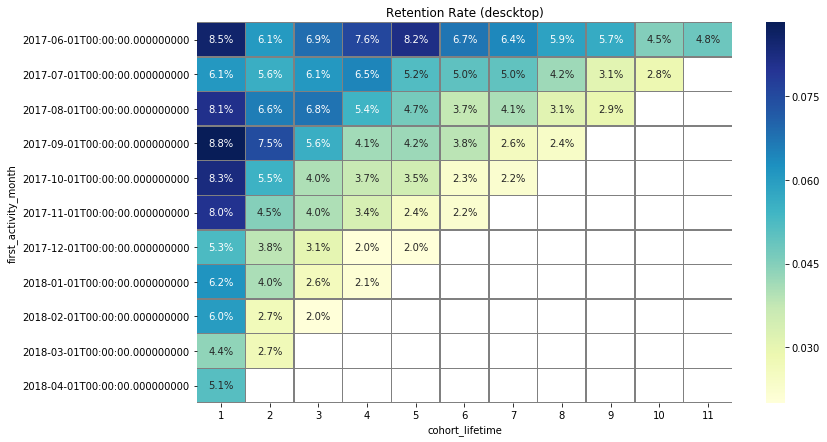

In [186]:
#Построим heatmap
plt.figure(figsize=(12, 7))
plt.title('Retention Rate (descktop)')
sns.heatmap(retention_desktop, annot=True, linewidths=0.5, fmt='.1%', linecolor='gray', cmap='YlGnBu')

### Retention Rate (Touch)

In [187]:
touch_visits = visits.query('device == "touch"')

In [188]:
#Построим когорты
touch_cohorts = (touch_visits.groupby(['first_activity_month', 'cohort_lifetime'])
           .agg({'uid':'nunique'}).reset_index())

In [189]:
#Посчитаем количество пользователей в первый месяц существования когорты
initial_users_count_touch = touch_cohorts[touch_cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [190]:
#Перименуем название столбца с количеством первоначальных пользователей
initial_users_count_touch.columns = ['first_activity_month', 'cohort_users']

In [191]:
#Добавим столбец с количесвом первоначальных пользователей
touch_cohorts = touch_cohorts.merge(initial_users_count_touch, on='first_activity_month')

In [192]:
#Посчитаем ретеншен
touch_cohorts['retention'] = touch_cohorts['uid'] / touch_cohorts['cohort_users']

In [193]:
#Исключим из сводной таблицы RR первого месяца
touch_cohorts = touch_cohorts[touch_cohorts['cohort_lifetime'] > 0]

In [194]:
#Построим сводную таблицу
retention_touch = touch_cohorts.pivot_table(index='first_activity_month', 
                                columns='cohort_lifetime', 
                                values='retention', 
                                aggfunc='sum')

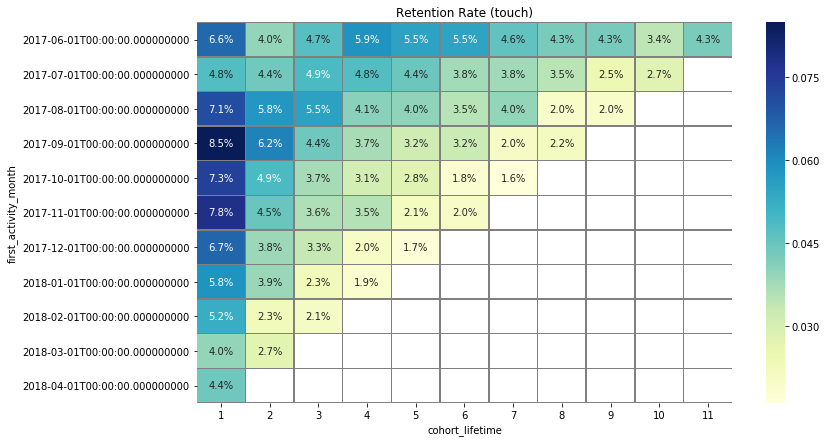

In [195]:
#Построим heatmap
plt.figure(figsize=(12, 7))
plt.title('Retention Rate (touch)')
sns.heatmap(retention_touch, annot=True, linewidths=0.5, fmt='.1%', linecolor='gray', cmap='YlGnBu')

<a id='Step_3_conclusion'></a>
### Вывод:
1. Заметный рост количества посещений в последние месяцы года. Пользователи готовятся к новогодним праздникам.
2. Падение количества посещений в конце марта. Причины необходимо исследовать.
3. Незначительный рост в конце мая. Причины необходимо исследовать. (Гипотеза: летом проводится много фестивалей)
4. Количество сессий на одного бользователя в день всегда больше 1. Есть тенденция к увеличению в районе нового года.
5. Наиболее часто встречающаяся продолжительность пользовательской сессии 60 секунд.
6. RR во второй месяц существования когорты остается менее 10% пользователей от первоначального количества. Далее большого оттока пользователей не отмечается
7. Пользователи desktop версии более склонны использовать приложение повторно.

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_4'></a>
## Метрики продаж 

<a id='Step_4_1'></a>
### Когда люди начинают покупать? 

In [196]:
#Дата первого посещения сайта храниться в переменной first_activity_date
#Присоединим first_activity_date к orders
orders = orders.merge(first_activity_date, on='uid')

In [197]:
#Определим, сколько времени проходит с момента первой активности на сайте до момента первой покупки
orders['time_to_buy'] = orders['buy_ts'] - orders['first_activity_date']

In [198]:
#Переведем в часы
orders['time_to_buy'] = orders['time_to_buy']/np.timedelta64(1,'h')

Text(0.5, 1.0, 'Время до первой покупки - распределение')

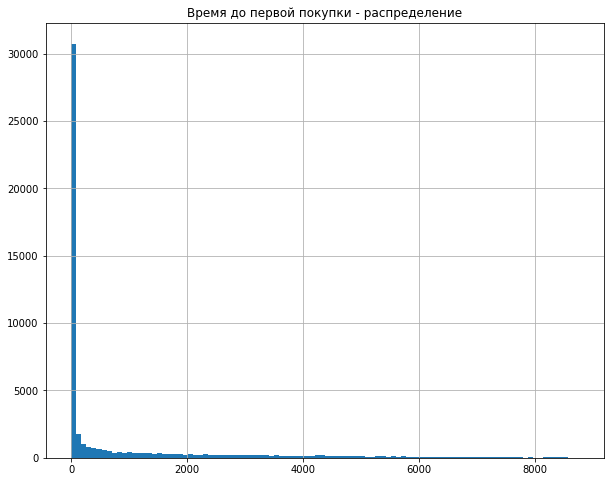

In [199]:
#Построим гистограмму
orders['time_to_buy'].hist(bins=100, figsize=(10,8), grid=True)
plt.title('Время до первой покупки - распределение')

Text(0.5, 1.0, 'Время до первой покупки - boxplot')

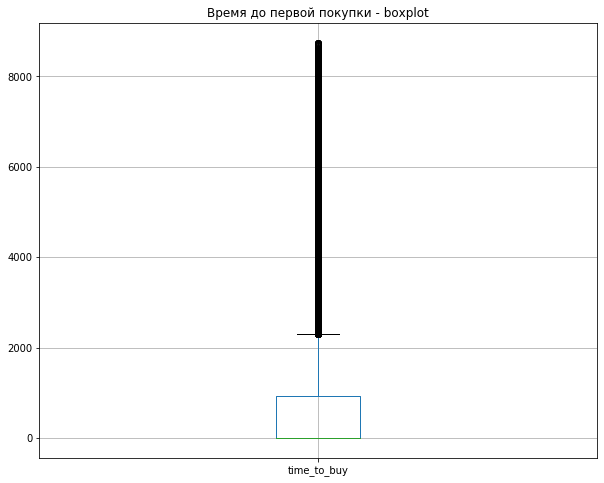

In [200]:
#Построим боксплот
orders.boxplot('time_to_buy', figsize=(10,8), grid=True)
plt.title('Время до первой покупки - boxplot')

In [201]:
orders['time_to_buy'].mean()

888.8850798373501

In [202]:
orders['time_to_buy'].median()

3.433333333333333

In [203]:
orders['time_to_buy'].mode()

0    0.016667
dtype: float64

<a id='Step_4_2'></a>
### Сколько раз покупают за период? 

In [204]:
orders['buy_year'] = orders['buy_ts'].dt.year

In [205]:
orders['buy_week'] = orders['buy_ts'].dt.week

In [206]:
orders_count_by_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'uid':'count'})
orders_count_by_user.columns = ['number_of_orders']
orders_count_by_user.reset_index()

,buy_year,buy_week,uid,number_of_orders
0,2017,22,1575281904278712,2
1,2017,22,31782048561502182,1
2,2017,22,106620219523201745,1
3,2017,22,123938579328720209,1
4,2017,22,138933889262593703,1
...,...,...,...,...
43293,2018,22,18291913252481425332,1
43294,2018,22,18315976142101556204,1
43295,2018,22,18334852012373166529,1
43296,2018,22,18378864100483916241,1


Text(0, 0.5, 'Среднее количество заказов')

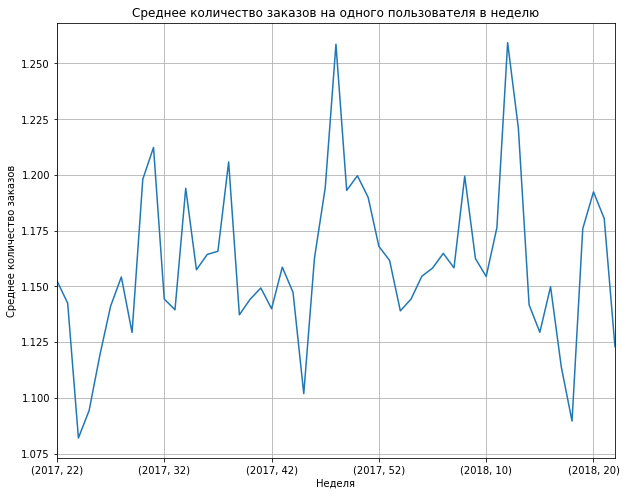

In [207]:
orders_count_by_user.groupby(['buy_year', 'buy_week'])['number_of_orders'].mean().plot(figsize=(10,8), grid=True)
plt.title('Среднее количество заказов на одного пользователя в неделю')
plt.xlabel('Неделя')
plt.ylabel('Среднее количество заказов')

<a id='Step_4_3'></a>
### Какой средний чек? 

In [208]:
mean_revenue = orders.groupby(['buy_year', 'buy_week'])['revenue'].mean()

Text(0, 0.5, 'Средняя выручка')

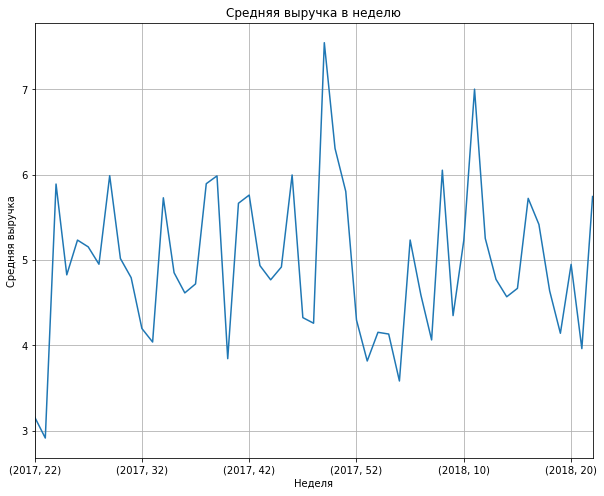

In [209]:
mean_revenue.plot(figsize=(10,8), grid=True)
plt.title('Средняя выручка в неделю')
plt.xlabel('Неделя')
plt.ylabel('Средняя выручка')

In [210]:
mean_revenue.describe()

count    53.000000
mean      4.951729
std       0.904931
min       2.914264
25%       4.296451
50%       4.851616
75%       5.722618
max       7.546664
Name: revenue, dtype: float64

<a id='Step_4_4'></a>
### Сколько денег приносят? (LTV)

In [211]:
#Выделим месяц покупки для каждой транзакции
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [212]:
#Получим месяц первой покупки для каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [213]:
#Посчитаем количество новых покупателей за каждый месяц
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [214]:
#Добавим месяц первой покупки для каждого покупателя в orders
new_orders = orders.merge(first_orders,on='uid')

In [215]:
#Получим помесячную выручку по каждой когорте
cohorts = new_orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

In [216]:
#Добавим количество новых пользователей в месяц в cohorts
report = cohorts.merge(cohort_sizes,on='first_order_month')

In [217]:
#Условиями задачи маржинальность не задана. Примем маржинальность за 1
margin_rate = 1

In [218]:
#Определим валовую прибыль
report['gp'] = report['revenue'] * margin_rate

In [219]:
#Определим возраст когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [220]:
#Найдем LTV для каждой когорты в месяц
report['ltv'] = report['gp'] / report['n_buyers']


# РЕВЬЮЕР: ПЕРЕВОДИД ДАТУ В ФОРМАТ STR
report['first_order_month'] = report['first_order_month'].astype(str)

In [221]:
#Построим сводную таблицу
output = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean')
output.fillna(' ')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.02253,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.11759,0.52093,3.97579,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.06527,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02-01,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


In [222]:
output = output.cumsum(axis=1).round(2)

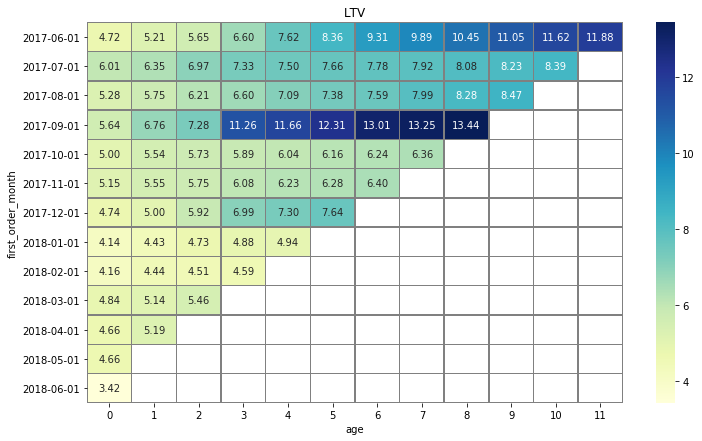

In [223]:
#Построим heatmap
plt.figure(figsize=(12, 7))
plt.title('LTV')
sns.heatmap(output, annot=True, yticklabels=True, linewidths=0.5, fmt='.2f', linecolor='gray', cmap='YlGnBu')

<a id='Step_4_conclusion'></a>
### Вывод:
1. Как правило, время между первым визитом и покупкой не превышает 1 час
2. Средний чек составляет 4.95
3. Максимальное LTV - 13,44
4. Минимальное LTV - 3.42

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_5'></a>
## Метрики маркетинга 

<a id='Step_5_1'></a>
### Сколько денег потратили? Всего / на каждый источник / по времени 

In [224]:
#Найдем общую сумму затрат на привлечение трафика
costs['costs'].sum()

329131.62

In [225]:
#Найдем общую сумму затрат по каждому источнику
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

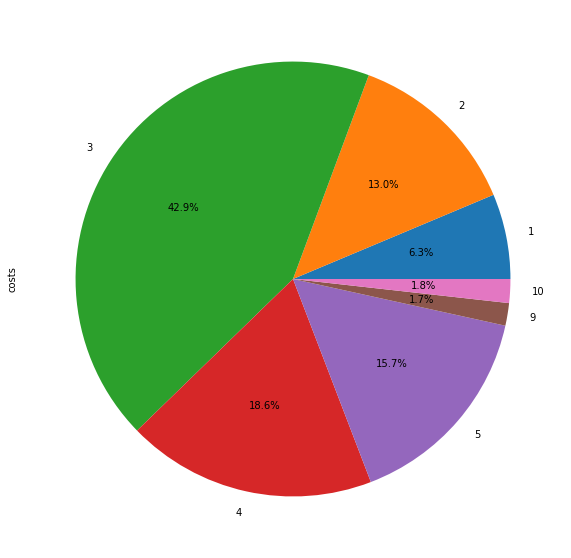

In [226]:
costs.groupby('source_id')['costs'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

In [230]:
#Выделим месяц, в который был произведен платеж
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs['cost_month'] = costs['cost_month'].astype(str)

In [231]:
#Найдем сумму затрат по месяцам в разрезе источников трафика
costs_by_month = costs.pivot_table(
    index='source_id',
    columns='cost_month',
    values='costs',
    aggfunc='sum').round()

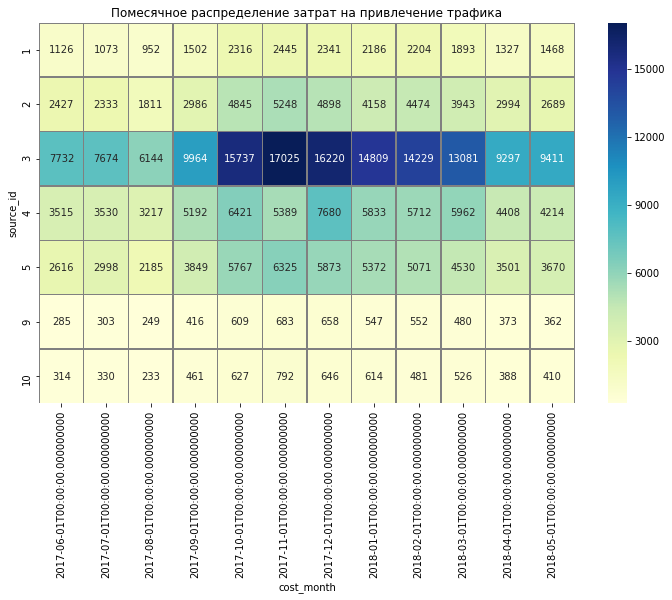

In [232]:
plt.figure(figsize=(12, 7))
plt.title('Помесячное распределение затрат на привлечение трафика')
sns.heatmap(costs_by_month, annot=True, linewidths=0.5, fmt='.0f', linecolor='gray', cmap='YlGnBu')

<a id='Step_5_2'></a>
### Сколько стоило привлечение одного покупателя из каждого источника? 

In [101]:
#Найдем расходы по месяцам в разрезе источников трафика
costs_grouped = costs.groupby(['cost_month', 'source_id']).agg({'costs':'sum'})
costs_grouped.columns = ['costs_by_sourse']

In [102]:
#Найдем первый источник трафика для каждого пользователя.
visits = visits.sort_values(by='start_ts')
user_first_sourse = visits.groupby('uid').agg({'source_id':'first'})
user_first_sourse.columns = ['user_first_sourse']

In [103]:
#Найдем дату первой покупки для каждого пользователя
user_first_order_month = orders.groupby('uid').agg({'buy_ts':'min'})
user_first_order_month.columns = ['user_first_order_month']
user_first_order_month['user_first_order_month'] = user_first_order_month['user_first_order_month'].astype('datetime64[M]')

In [104]:
#Добавим в orders первый источник трафика для каждого пользователя
orders = orders.merge(user_first_sourse, on='uid').reset_index()

In [105]:
#Добавим в orders дату первой первой покупки для каждого пользователя
orders = orders.merge(user_first_order_month, on='uid').reset_index()

In [106]:
#Найдем количество уникальных пользователей для каждого источника трафика по месяцам
orders_grouped = orders.groupby(['user_first_order_month', 'user_first_sourse']).agg({'uid':'nunique'})
orders_grouped.columns = ['n_users']

In [107]:
costs_grouped.reset_index(level=0, inplace=True)

In [108]:
costs_grouped.reset_index(level=0, inplace=True)

In [109]:
orders_grouped.reset_index(level=0, inplace=True)

In [110]:
orders_grouped.reset_index(level=0, inplace=True)

In [111]:
costs_report = pd.merge(costs_grouped, orders_grouped, left_on=['cost_month', 'source_id'], right_on=['user_first_order_month', 'user_first_sourse']).reset_index(drop=True)

In [112]:
#Посчитаем CAC
costs_report['cac'] = costs_report['costs_by_sourse']/costs_report['n_users']

In [113]:
#Посмотрим, как затраты были распределны по месяцам
costs_report_pivot = costs_report.pivot_table(
    index= 'cost_month',
    columns = 'source_id', 
    values='cac')

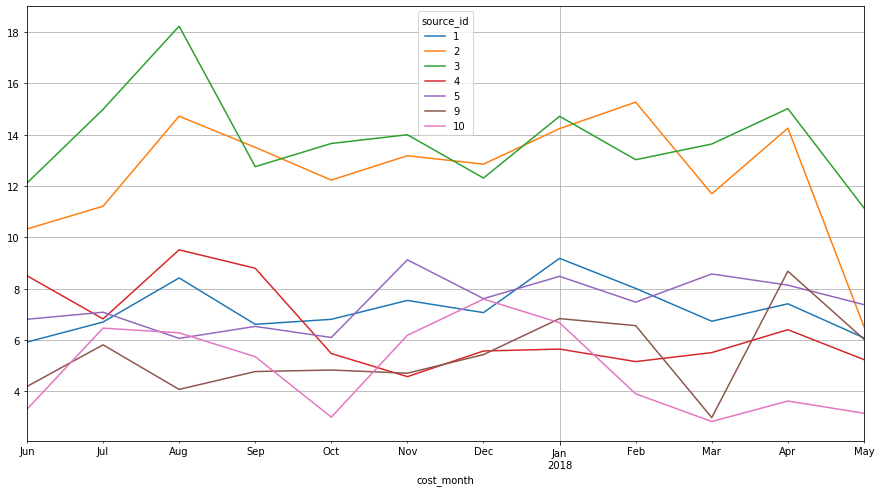

In [114]:
costs_report_pivot.plot(figsize=(15,8), grid=True)

<a id='Step_5_3'></a>
### На сколько окупились расходы? (ROI) 

In [115]:
#Посчитаем количество пользователей
c_size = orders.groupby(['user_first_order_month','user_first_sourse']).agg({'uid':'nunique'}).reset_index()
c_size.columns = ['user_first_order_month', 'user_first_sourse', 'n_users']

In [116]:
#Посчитаем выручку
c_revenue = orders.groupby(['user_first_order_month','user_first_sourse']).agg({'revenue':'sum'}).reset_index()
c_revenue.columns = ['user_first_order_month', 'user_first_sourse', 'c_revenue']

In [117]:
#Добавим информацию о количестве пользователей в orders
orders = orders.merge(c_size, on=['user_first_order_month', 'user_first_sourse']).reset_index(drop=True)

In [118]:
#Добавим информацию о выручке в orders
orders = orders.merge(c_revenue, on=['user_first_order_month', 'user_first_sourse']).reset_index(drop=True)

In [119]:
#Посчитаем валовую выручку
orders['gp'] = orders['c_revenue'] * margin_rate

In [120]:
#Посчитаем ltv
orders['ltv'] = orders['gp']/orders['n_users']

In [121]:
#Определим возраст когорты
orders['age'] = (orders['order_month'] - orders['user_first_order_month']) / np.timedelta64(1, 'M')
orders['age'] = orders['age'].round().astype('int')

In [122]:
final_report = pd.merge(orders, costs_report, on=['user_first_order_month', 'user_first_sourse']).reset_index(drop=True)

In [123]:
#Посчитаем romi
final_report['romi'] = final_report['ltv'] / final_report['cac']

In [124]:
output_romi_source = final_report.pivot_table(
        index='user_first_sourse', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

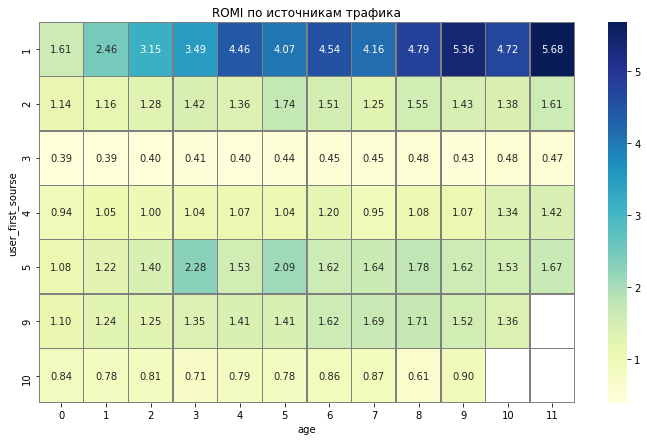

In [125]:
plt.figure(figsize=(12, 7))
plt.title('ROMI по источникам трафика')
sns.heatmap(output_romi_source, annot=True, linewidths=0.5, fmt='.2f', linecolor='gray', cmap='YlGnBu')

In [126]:
devises = visits[['uid', 'device']]

In [127]:
orders = orders.merge(devises, on='uid').reset_index(drop=True)

Text(0.5, 0, 'Месяц')

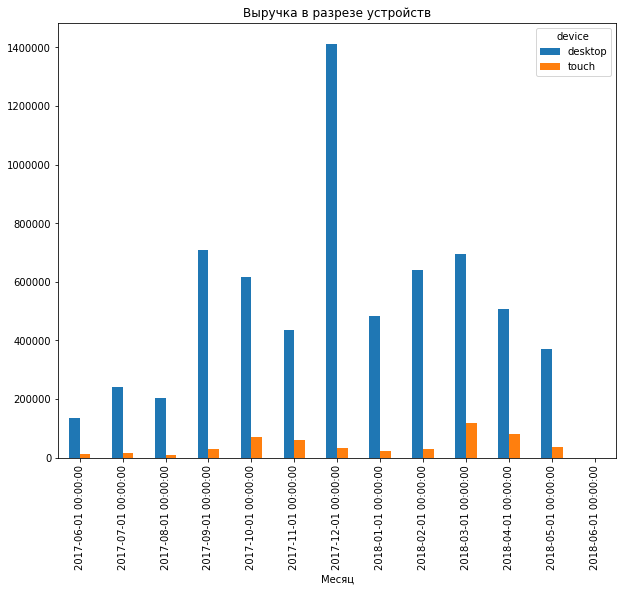

In [128]:
#Посчитаем выручку в разрезе устройств
orders.pivot_table(
    index='order_month',
    columns='device',
    values='revenue',
    aggfunc='sum').plot(kind='bar', figsize=(10,8))
plt.title('Выручка в разрезе устройств')
plt.xlabel('Месяц')

Text(0.5, 0, 'Месяц')

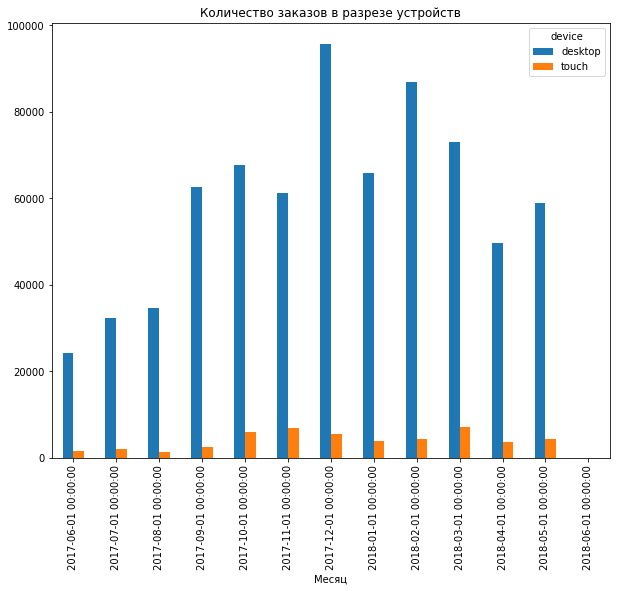

In [129]:
#Посчитаем количество заказов в разрезе устройств
orders.pivot_table(
    index='order_month',
    columns='device',
    values='uid',
    aggfunc='count').plot(kind='bar', figsize=(10,8))
plt.title('Количество заказов в разрезе устройств')
plt.xlabel('Месяц')

<a id='Step_5_conclusion'></a>
### Вывод:
1. Наиболее затратные каналы привелечения трафика 1 и 2 
2. На окупаемость выходят с первого месяца все каналы, кроме 3 и 10 (они вообще не выходят на окупаемость)
3. Лидер по окупаемости канал - 1. Заметно обгоняет все другие
4. Наибольшая выручка приходит с платформы desktop

**<a href='#top'>Вернуться в начало</a>**

<a id='Step_6'></a>
## Общий вывод:

#### Продукт
1. Сезонность пользовательской активности:
    - Существенный рост на кануне нового года
    - Незначительное падение в конце марта (причины требуют дополнительного исследования)
    - Незначительный рост в конце мая (причины требуют дополнительного исследования)
2. Характеристики пользовательской сессии:
    - Среднее количество пользовательских сессий в день больше 1 на протяжении всего года. Есть тенденция к увеличению их количества в районе Нового года
    - Наиболее часто встречающаяся продолжительность пользовательской сессии равна 1 минуте
3. Retention Rate
    - во второй месяц существования когорты остается менее 10% пользователей от первоначального количества. Далее большого оттока пользователей не отмечается
4. Пользователи desktop версии более склонны использовать приложение повторно.

#### Продажи
1. Как правило, время между первым визитом и покупкой не превышает 1 час
2. Средний чек составляет 4.95
3. Максимальное LTV - 13,44
4. Минимальное LTV - 3.42

#### Маркетинг
1. Наиболее затратные каналы привелечения трафика 1 и 2 
2. На окупаемость выходят с первого месяца все каналы, кроме 3 и 10
3. 3 и 10 на окупаемость не выходят никогда
4. Лидер по окупаемости канал - 1. Заметно обгоняет все другие. При этом он самый дорогостоящий
5. Наибольшая выручка приходит с платформы desktop
6. На основе метрик CAC и ROMI можно рекомендовать инвестировать в каналы 1

**<a href='#top'>Вернуться в начало</a>**